In [1]:
import numpy as np
import base64
import io
from PIL import Image, ImageDraw
import json

In [2]:
k = b'[[348, 0, 497, 367, 0], [143, 105, 401, 369, 17]]'

In [3]:
detection_results = json.loads(k.decode('utf-8'))

In [4]:
detection_results

[[348, 0, 497, 367, 0], [143, 105, 401, 369, 17]]

In [5]:
with open('image_b64.txt') as f:
    b64_img_str = f.read()

In [6]:
b64_img = base64.b64decode(b64_img_str)
image_bytes = io.BytesIO(b64_img)

In [7]:
pil_img = Image.open(image_bytes)

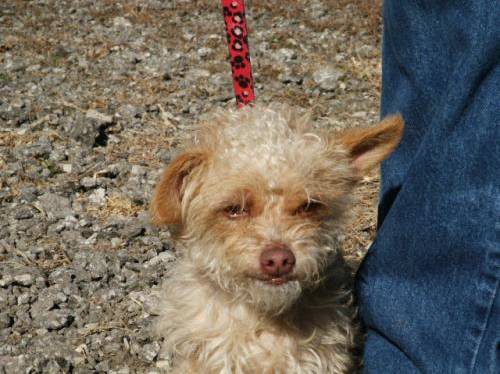

In [8]:
pil_img

In [9]:
draw = ImageDraw.Draw(pil_img)
classes = {value['id'] - 1: value['name'] for value in json.load(open('coco_90.json', 'r')).values()}
num_classes = 90
colors = [np.random.randint(0, 256, 3).tolist() for _ in range(num_classes)]
for detection_result in detection_results:
    xmin, ymin, xmax, ymax, class_id = detection_result
    class_name = classes[class_id]
    draw.rectangle([(xmin, ymin), (xmax, ymax)])
    draw.text((xmin, ymin), class_name)

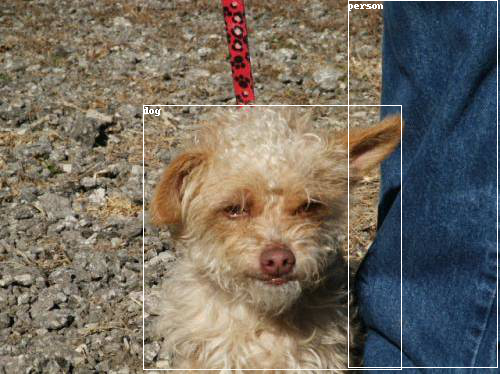

In [10]:
pil_img